In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,8)
plt.rcParams['figure.dpi']=700

In [4]:
df=pd.read_csv('/content/glass.csv')

In [5]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# EDA

In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.shape

(999, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 78.2 KB


In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(214, 10)

In [13]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
names=df.columns
names

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [16]:
# Visualization

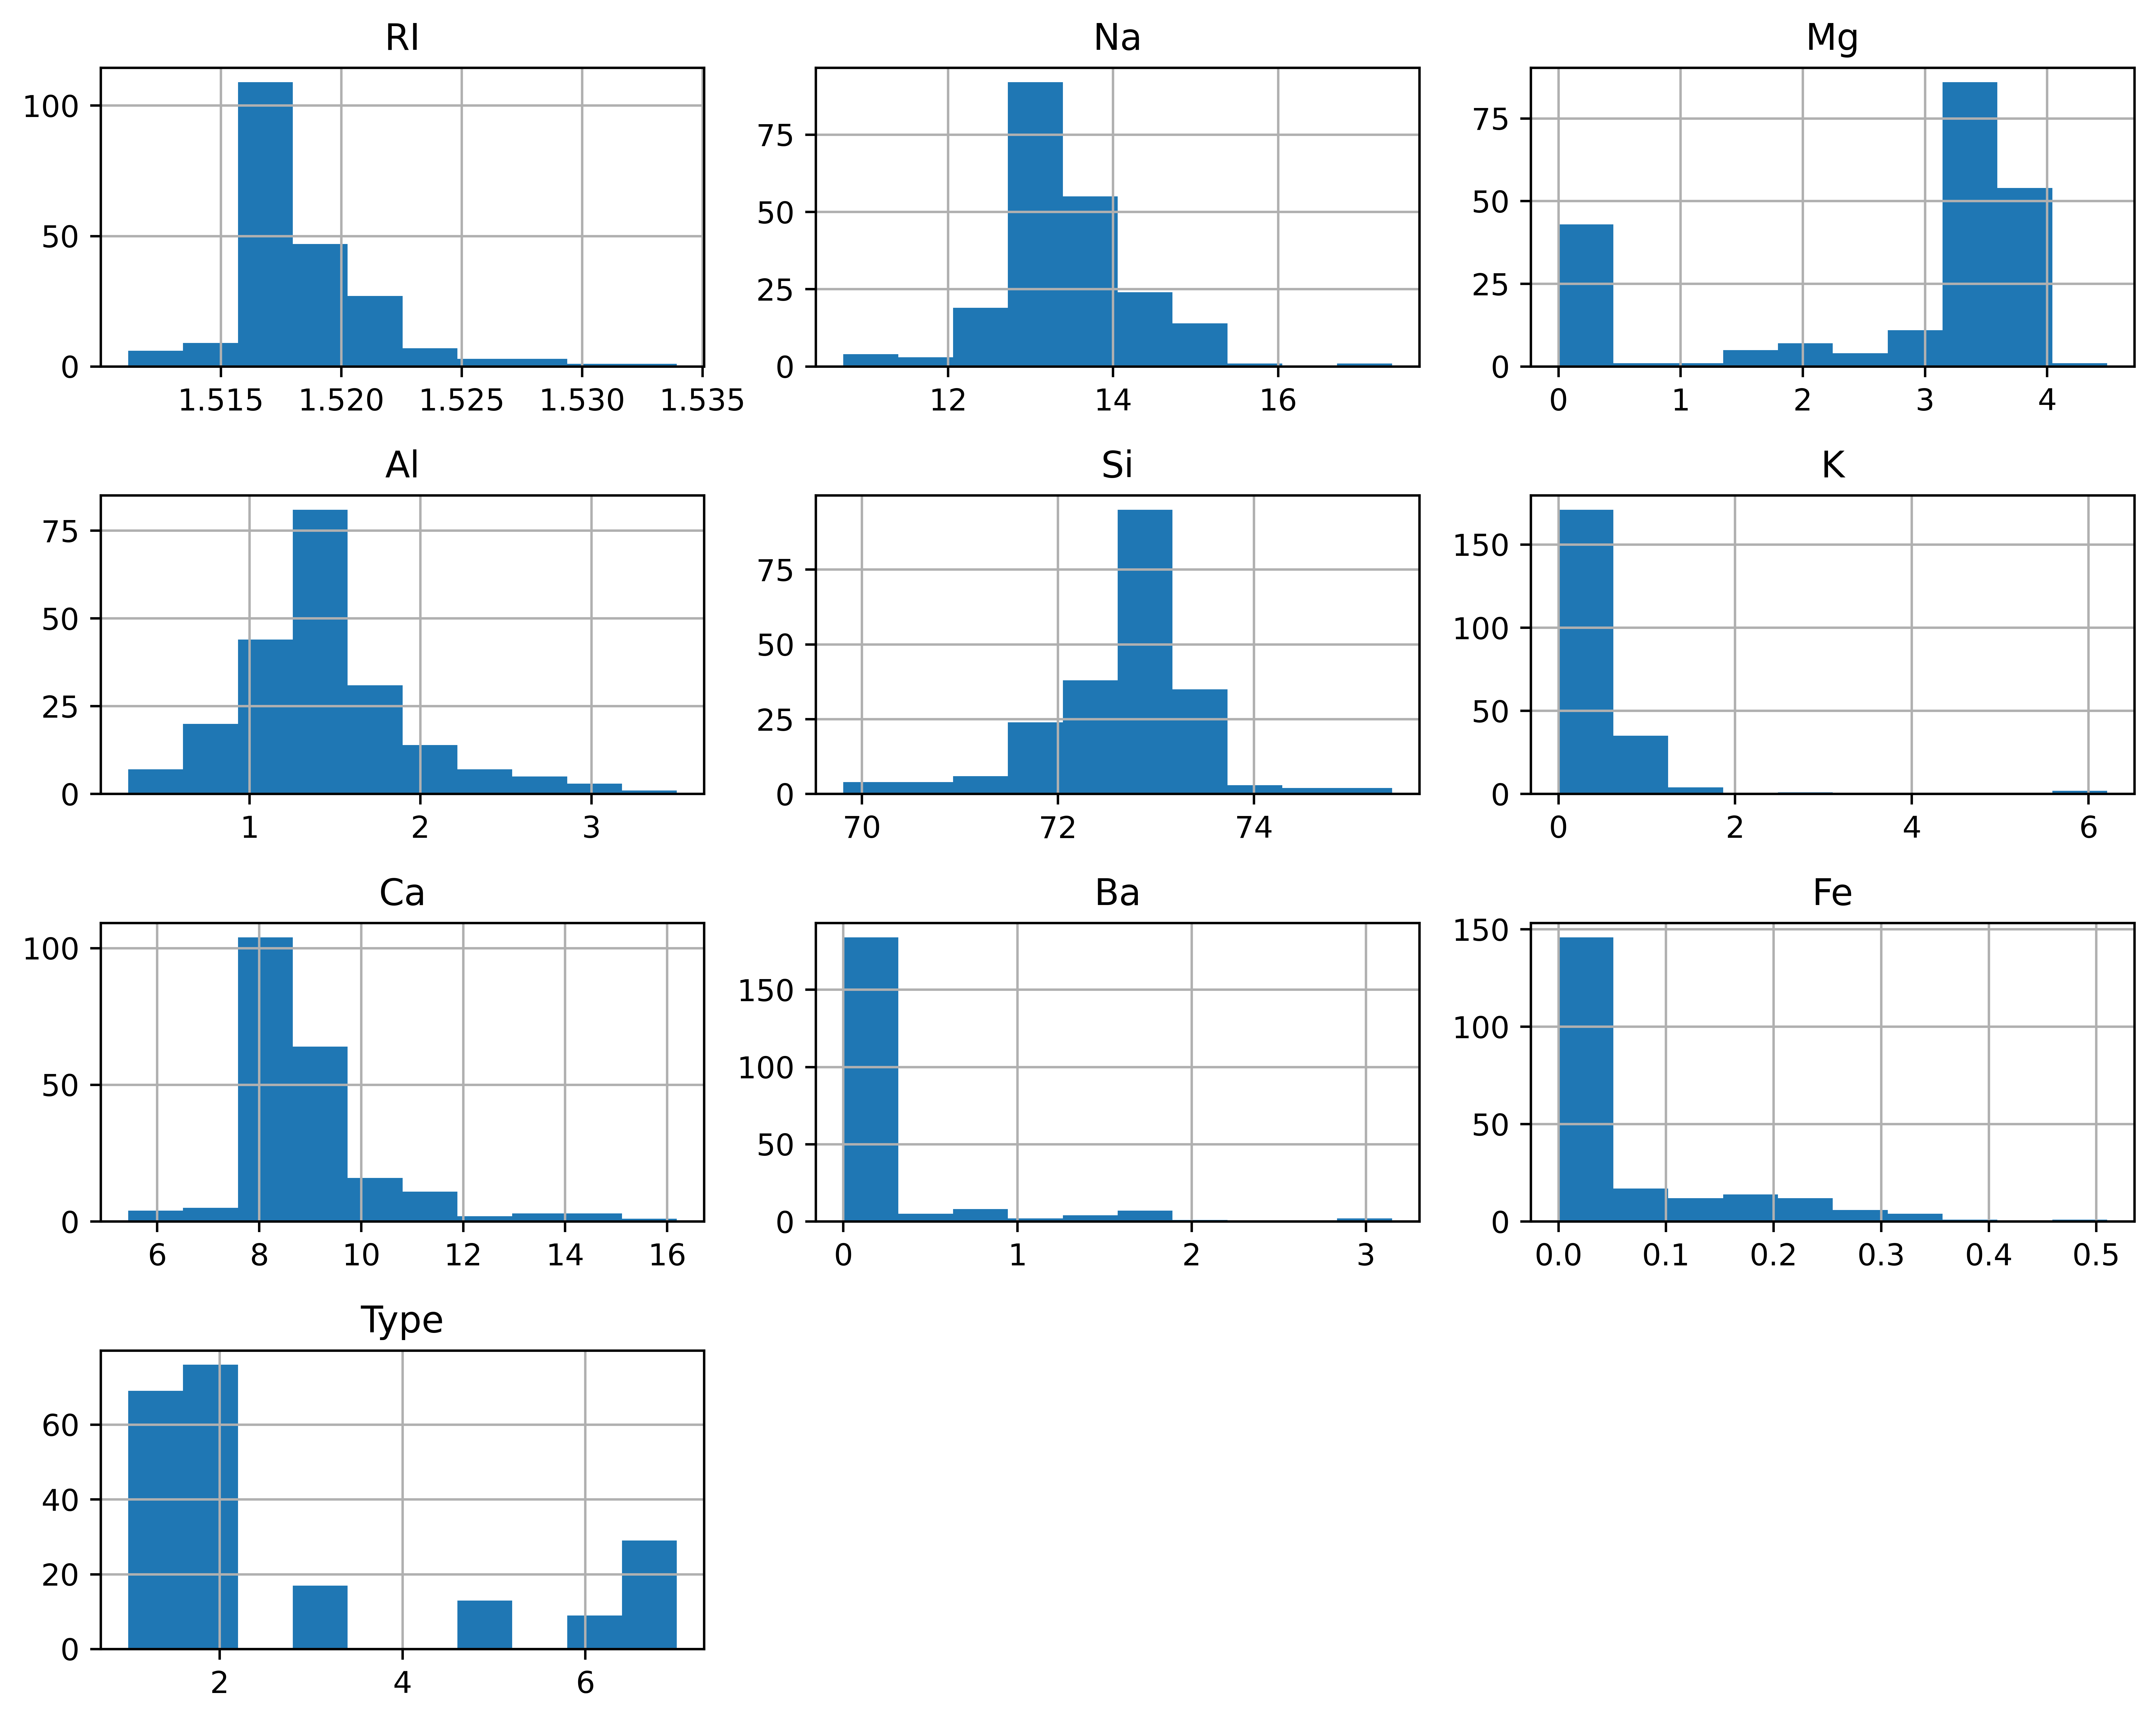

In [17]:
df.hist()
plt.tight_layout()

<Axes: >

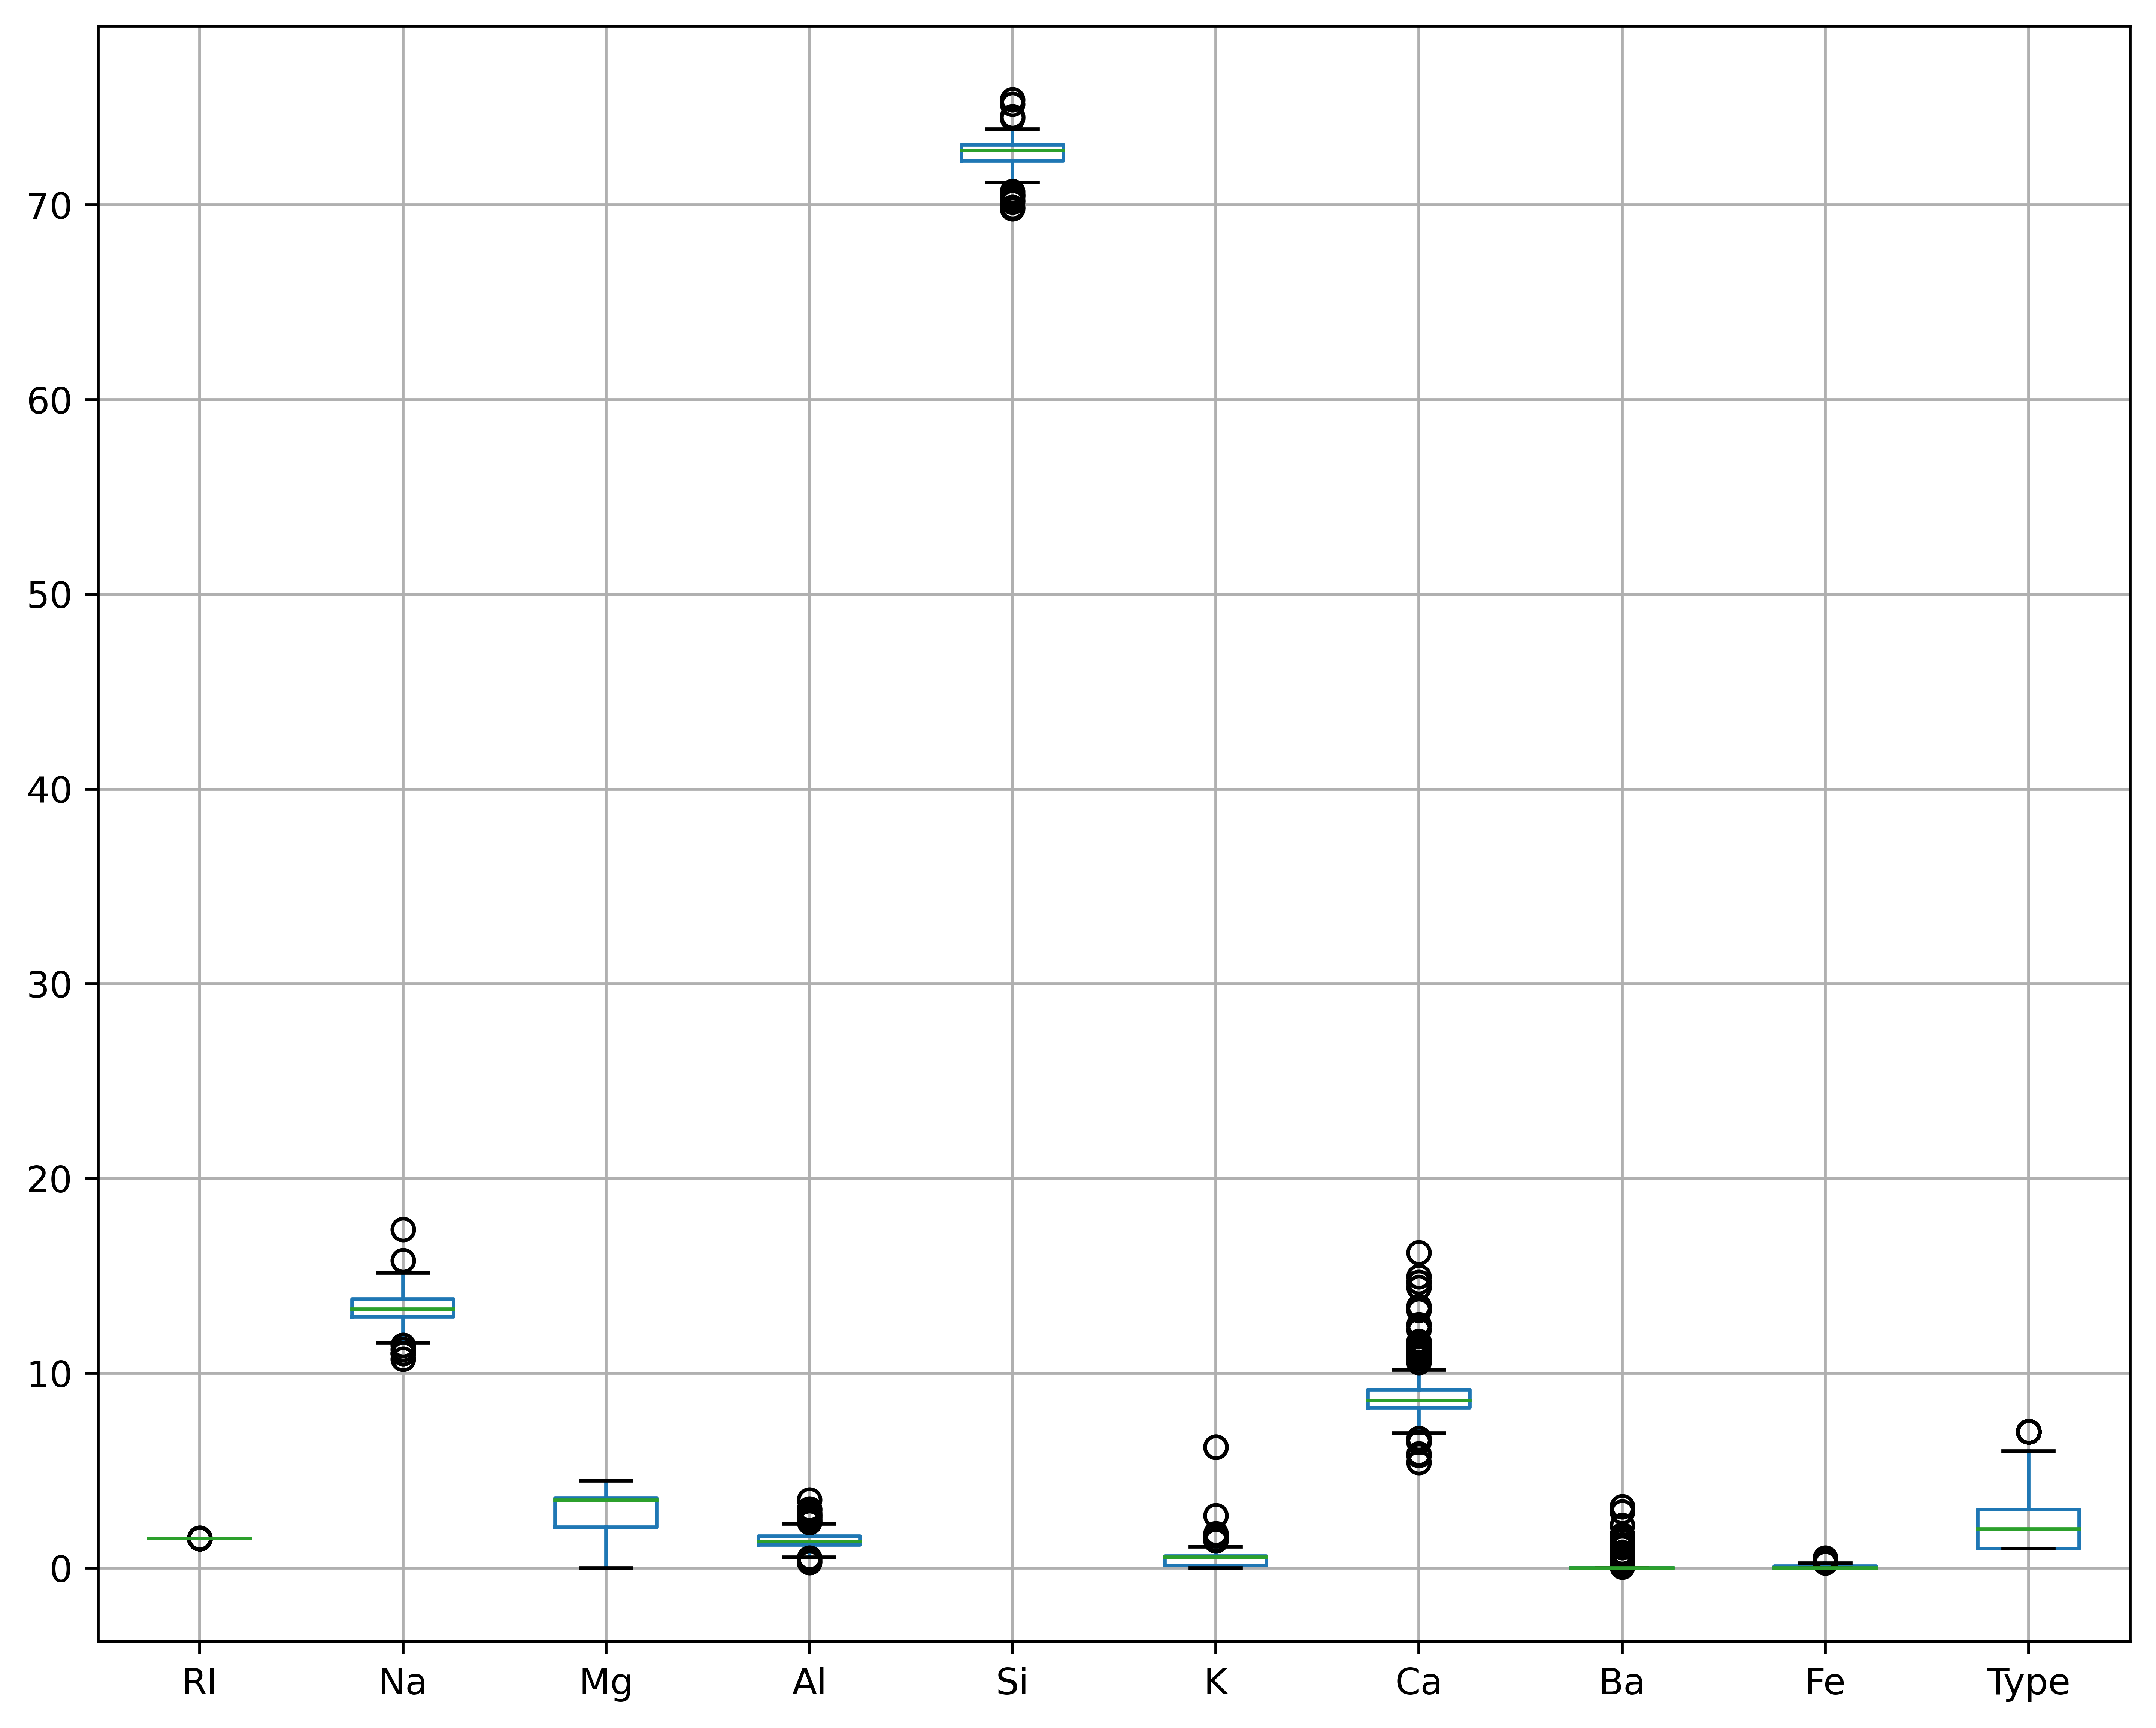

In [18]:
df.boxplot()

In [19]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

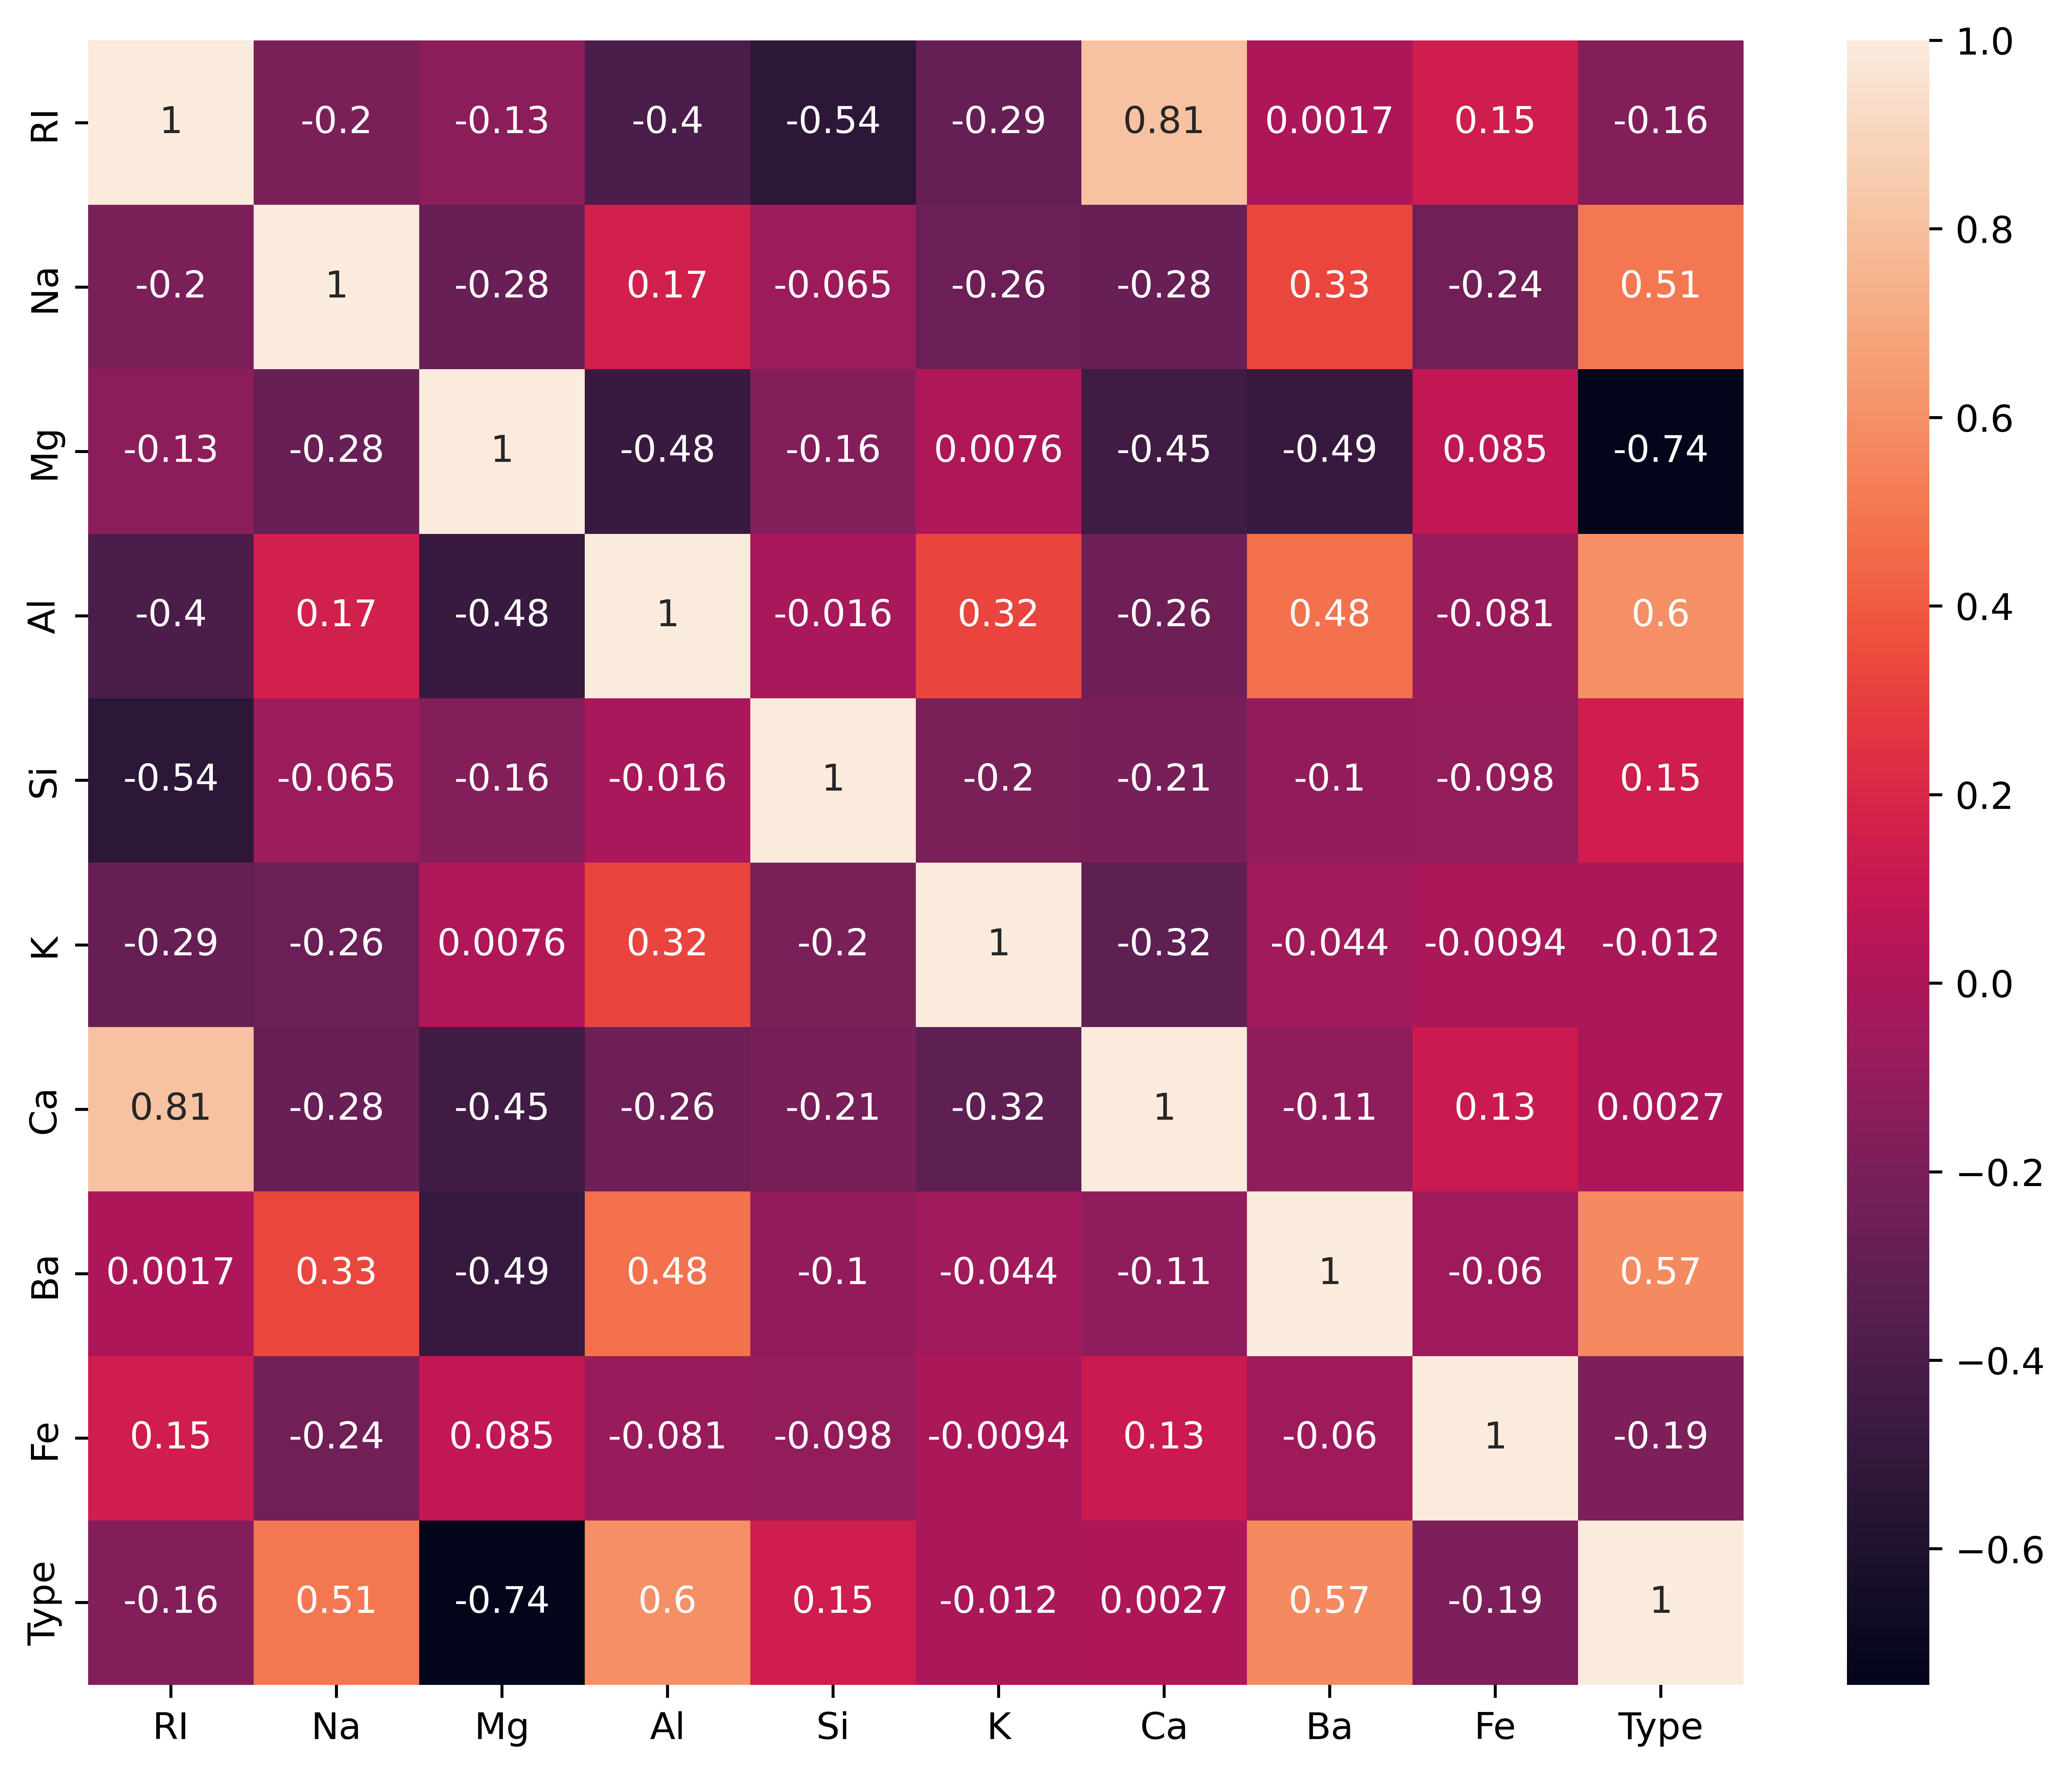

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
x=df.iloc[:,:-1]
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [23]:
y=df['Type']
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
209    7.0
210    7.0
211    7.0
212    7.0
213    7.0
Name: Type, Length: 213, dtype: float64

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [34]:
def prediction(model):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print('Training Accuracy:',model.score(x_train,y_train))
  print('Testing Accuracy:',model.score(x_test,y_test))
  print('Confusion matrix:',classification_report(y_test,y_pred))

In [26]:
# Random Forest

In [28]:
kfold=KFold(n_splits=10,random_state=1,shuffle=True)
num_tree=100
max_feature=3
model=RandomForestClassifier(n_estimators=num_tree,max_features=max_feature)
result=cross_val_score(model,x_train,y_train,cv=kfold)
result2=cross_val_score(model,x_test,y_test,cv=kfold)
print('Training Accuracy:',result.mean())
print('Testing Accuracy:',result2.mean())


Training Accuracy: 0.7764705882352941
Testing Accuracy: 0.7


In [36]:
prediction(RandomForestClassifier(n_estimators=num_tree,max_features=max_feature))


Training Accuracy: 1.0
Testing Accuracy: 0.813953488372093
Confusion matrix:               precision    recall  f1-score   support

         1.0       0.88      0.83      0.86        18
         2.0       0.80      0.92      0.86        13
         3.0       0.60      0.50      0.55         6
         5.0       0.00      0.00      0.00         1
         6.0       0.67      1.00      0.80         2
         7.0       1.00      1.00      1.00         3

    accuracy                           0.81        43
   macro avg       0.66      0.71      0.68        43
weighted avg       0.80      0.81      0.80        43



In [37]:
# BaggingClassifier

In [42]:
kfold=KFold(n_splits=10,random_state=1,shuffle=True)
cart=DecisionTreeClassifier()
num_tree=100
model=BaggingClassifier(estimator=cart,n_estimators=num_tree,random_state=1)
result=cross_val_score(model,x_train,y_train,cv=kfold)
result2=cross_val_score(model,x_test,y_test,cv=kfold)
print('Training Accuracy:',result.mean())
print('Testing Accuracy:',result2.mean())

Training Accuracy: 0.7588235294117647
Testing Accuracy: 0.655


In [40]:
prediction(BaggingClassifier(estimator=cart,n_estimators=num_tree,random_state=1))

Training Accuracy: 1.0
Testing Accuracy: 0.7906976744186046
Confusion matrix:               precision    recall  f1-score   support

         1.0       0.83      0.83      0.83        18
         2.0       0.77      0.77      0.77        13
         3.0       0.75      0.50      0.60         6
         5.0       1.00      1.00      1.00         1
         6.0       0.50      1.00      0.67         2
         7.0       1.00      1.00      1.00         3

    accuracy                           0.79        43
   macro avg       0.81      0.85      0.81        43
weighted avg       0.80      0.79      0.79        43



In [41]:
# Boosting Classifier

In [43]:
kfold=KFold(n_splits=10,random_state=1,shuffle=True)
cart=DecisionTreeClassifier()
num_tree=100
model=AdaBoostClassifier(estimator=cart,n_estimators=num_tree,random_state=1)
result=cross_val_score(model,x_train,y_train,cv=kfold)
result2=cross_val_score(model,x_test,y_test,cv=kfold)
print('Training Accuracy:',result.mean())
print('Testing Accuracy:',result2.mean())

Training Accuracy: 0.6470588235294119
Testing Accuracy: 0.54


In [44]:
prediction(AdaBoostClassifier(estimator=cart,n_estimators=num_tree,random_state=1))

Training Accuracy: 1.0
Testing Accuracy: 0.7209302325581395
Confusion matrix:               precision    recall  f1-score   support

         1.0       0.92      0.67      0.77        18
         2.0       0.58      0.85      0.69        13
         3.0       0.60      0.50      0.55         6
         5.0       0.00      0.00      0.00         1
         6.0       0.67      1.00      0.80         2
         7.0       1.00      1.00      1.00         3

    accuracy                           0.72        43
   macro avg       0.63      0.67      0.63        43
weighted avg       0.75      0.72      0.72        43

